In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Read the file
data=pd.read_csv("delivery_time.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


C:\Users\91701\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

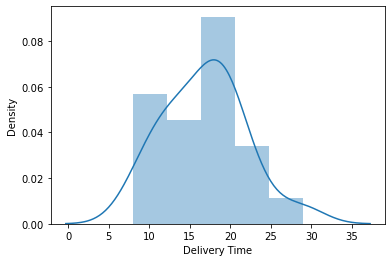

In [6]:
#distplots 
sns.distplot(data["Delivery Time"])

C:\Users\91701\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

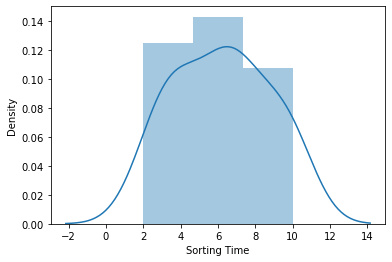

In [7]:

sns.distplot(data["Sorting Time"])


In [8]:
import statsmodels.formula.api as smf

In [9]:
data1=data.rename(columns={'Delivery Time':'DT','Sorting Time':'ST'})

In [11]:
data1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
data1.columns

Index(['DT', 'ST'], dtype='object')

In [13]:
import statsmodels.formula.api as smf

In [14]:
#Building the model
model=smf.ols("DT~ST",data=data1).fit()

<AxesSubplot:xlabel='DT', ylabel='ST'>

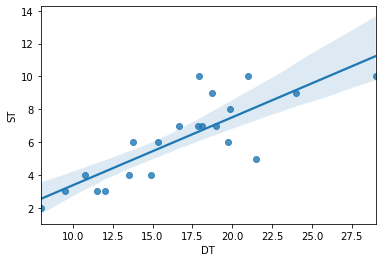

In [15]:
#Regressionplot
sns.regplot(x="DT",y="ST",data=data1)

In [16]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [17]:
model.tvalues

Intercept    3.823349
ST           6.387447
dtype: float64

In [18]:
model.summary()#R^2 value<.8

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        11:42:22   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Residuals
res=model.resid

In [20]:

res

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [21]:
data1.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [22]:
#finding the cooks distance and plotting it
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

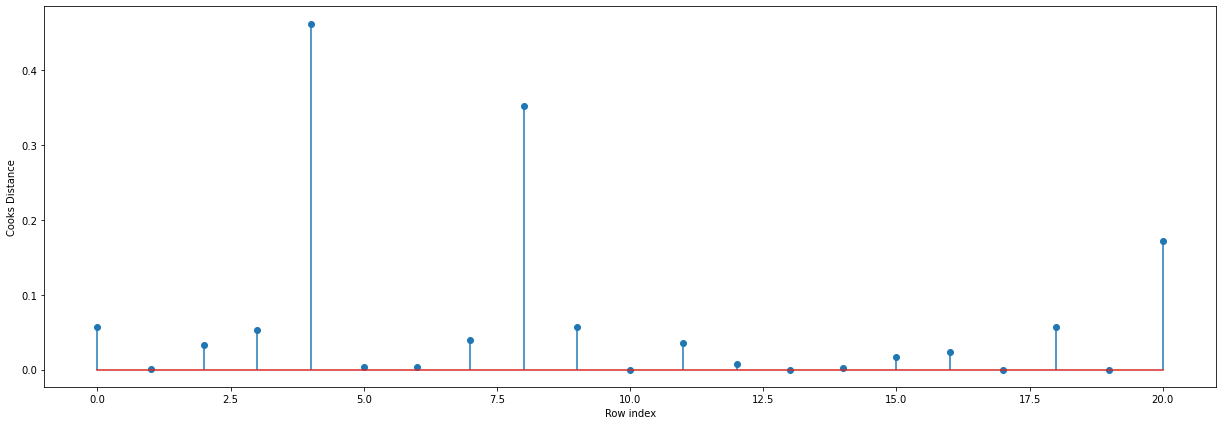

In [23]:
fig = plt.subplots(figsize=(21, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
(np.argmax(c),np.max(c))

(4, 0.4620530412650319)

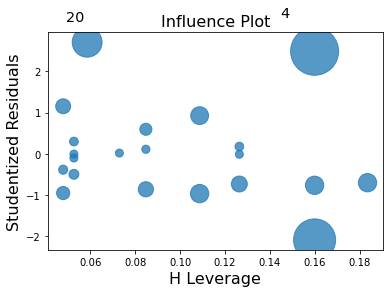

In [25]:
#for finding the leverage and removing the influential plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [26]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)


In [27]:
leverage_cutoff

0.42857142857142855

In [28]:
data1[data1.index.isin([ 4,20,8])]

,DT,ST
4,29.0,10
8,17.9,10
20,21.5,5


In [29]:
data2=data1.drop(data1.index[[4,20,8]],axis=0).reset_index()

In [30]:
data2

,index,DT,ST
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,5,15.35,6
5,6,19.00,7
6,7,9.50,3
7,9,18.75,9
8,10,19.83,8
9,11,10.75,4


In [31]:
data2=data2.drop(['index'],axis=1)

In [34]:
data2

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,15.35,6
5,19.00,7
6,9.50,3
7,18.75,9
8,19.83,8
9,10.75,4


In [32]:
#Building the model onceagain
model1=smf.ols("DT~ST",data=data2).fit()

In [33]:
model1.summary()#R^2 VALUE>.8

C:\Users\91701\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     79.94
Date:                Tue, 15 Jun 2021   Prob (F-statistic):           1.27e-07
Time:                        11:43:26   Log-Likelihood:                -35.450
No. Observations:                  18   AIC:                             74.90
Df Residuals:                      16   BIC:                             76.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0240      1.175      5.126      0.000       3.533       8.515
ST             1.6741      0.187      8.941      0.000       1.277       2.071
==============================================================================
Omnibus:                        1.044   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.959
Skew:                           0.447   Prob(JB):                        0.619
Kurtosis:                       2.307   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

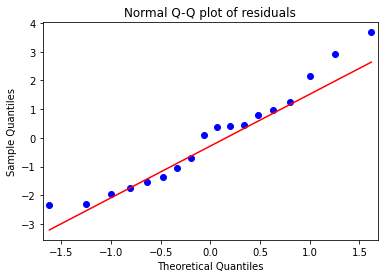

In [41]:
#Q-Q plot where residuals are normally distributed

import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [42]:
#Standardization
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

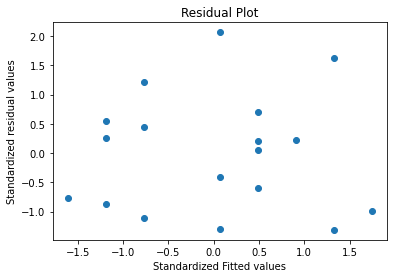

In [43]:
#Residualplots where the residuals are scattered
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

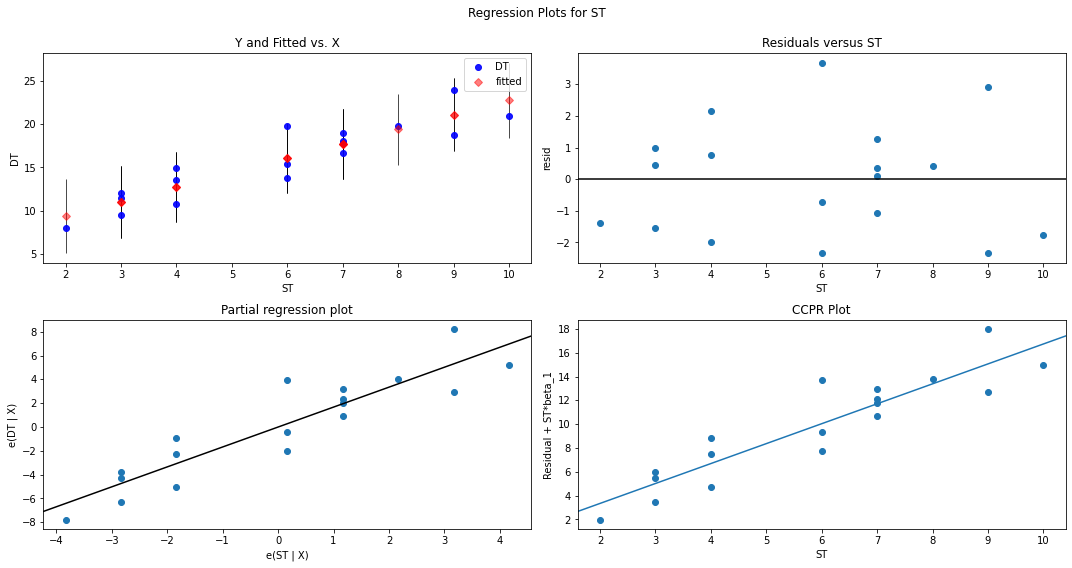

In [44]:
#Regression plots
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "ST", fig=fig)
plt.show()